In [ ]:
!python --version

Python 3.9.1


<img src="UP Data Science Society Logo 2.png" width=700 />

### [0] Introduction to Python
**Prepared by:**

- Lanz Lagman
- Dexter To

**Topics to cover:** 

- Loops

**Weekly Objectives:**

- 


**References:**
- [Johnson, MIT Course 18.335 - Square Roots via Newton’s Method](https://math.mit.edu/~stevenj/18.335/newton-sqrt.pdf)
- [Jake Vanderplas - Statistics for Hackers - PyCon 2016](https://www.youtube.com/watch?v=Iq9DzN6mvYA)
    - [[Speaker Deck] Jake Vanderplas - Statistics for Hackers](https://speakerdeck.com/pycon2016/jake-vanderplas-statistics-for-hackers)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# I. Loops

> "If you can write a for-loop, you can do statistics."  
> Jake Vanderplas   

## A. `for` loops

- `for` loops iterate over each element of a sequential data type.

### 1. Basic Examples

- To iterate and print each element of `range(4)`:

In [ ]:
for i in range(4): 
    print(i)

0
1
2
3


In [ ]:
for i in range(4): print(i)

0
1
2
3


- To create a list and 1D numpy array:

In [ ]:
[i for i in range(4)]

[0, 1, 2, 3]

In [ ]:
np.array([i for i in range(4)])

array([0, 1, 2, 3])

### 2. `zip()`

- The `zip()` function takes in n-iterables of equal length then returns an iterator.
- Let's create two lists for latin letters and their greek equivalent, expressed via unicode.

In [ ]:
latin_list = ['a', 'b', 'c', 'd']
greek_list = [u'\u03B1', u'\u03B2', u'\u03B3', u'\u03B4']
greek_list

['α', 'β', 'γ', 'δ']

- Creating lists out of zipped items returns a series of tuples for each matching element.

In [ ]:
list(zip(latin_list,greek_list))

[('a', 'α'), ('b', 'β'), ('c', 'γ'), ('d', 'δ')]

- To use in for loops:

In [ ]:
for l, g in zip(latin_list,greek_list):
    print(f"Latin: {l}, Greek: {g}")

Latin: a, Greek: α
Latin: b, Greek: β
Latin: c, Greek: γ
Latin: d, Greek: δ


- In terms of `enumerate()`:

In [ ]:
for ind, l in enumerate(latin_list):
    print(ind, l)

0 a
1 b
2 c
3 d


- This is the equivalent `zip()` version:
- Note that `enumerate()` can only take a single iterable, unlike `zip()`.
- That is why, I prefer `zip()` instead of `enumerate()`, not only because of the much shorter character length, but also due to overall flexibility.

In [ ]:
for ind, l in zip(range(len(latin_list)),latin_list):
    print(ind, l)

0 a
1 b
2 c
3 d


### 3. `zip()` for plotting

- To iterate over each subplots, let's say we want to plot $x, x^2, x^3, x^4$:

In [ ]:
x = np.arange(0,101,1)
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

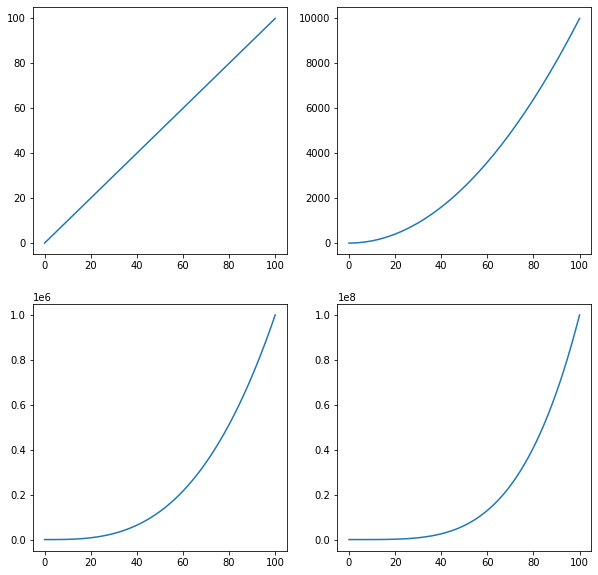

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

x = np.arange(0,101,1)

ax[0,0].plot(x, x)
ax[0,1].plot(x, x**2)
ax[1,0].plot(x, x**3)
ax[1,1].plot(x, x**4)


- But we want to perform a standard customization for each subplot, like removing the top and right border line and adding  x and y-labels. This could be done through:

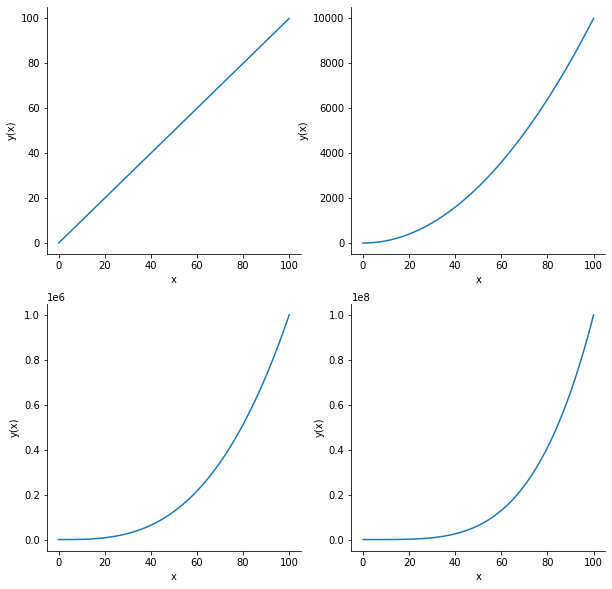

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

x = np.arange(0,101,1)

ax[0,0].plot(x, x)
ax[0,1].plot(x, x**2)
ax[1,0].plot(x, x**3)
ax[1,1].plot(x, x**4)

for axs in ax.reshape(-1):
    axs.set(xlabel='x', ylabel='y(x)')
    
    axs.spines['right'].set_visible(False)
    axs.spines['top'].set_visible(False)
    axs.tick_params(left=True, bottom=True, 
                    labelleft=True, labelbottom=True)

- But how do we include a loop for the title?
- We can use `zip()` for parallel iteration. We can therefore iterate over each axes and exponents.
- We can even include all the $y(x)$ and store them in `y_list` and include it to our zipped list.

In [ ]:
y_list = [x, x**2, x**3, x**4]

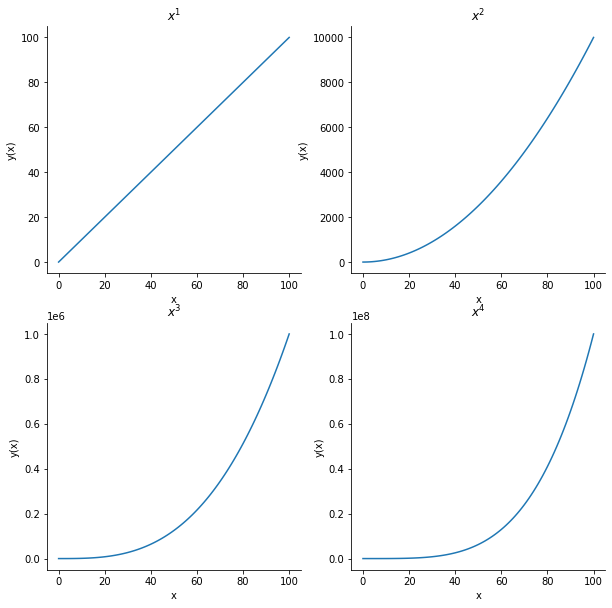

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(10,10))


for axs, i, y in zip(ax.reshape(-1), range(1,5), y_list):
    
    axs.plot(x,y)
    axs.set(title=f'$x^{i}$', xlabel='x', ylabel='y(x)')
    
    axs.spines['right'].set_visible(False)
    axs.spines['top'].set_visible(False)
    axs.tick_params(left=True, bottom=True, 
                    labelleft=True, labelbottom=True)

## B. `while` loops

- `while` loops execute a set of statements until a condition is met.
- In this case, we can demonstrate by creating a function for Newton's algorithm for approximating square roots.

### Newton's Algorithm

$$ x_{n+1} = \frac{1}{2}\left( x_n + \frac{a}{x_n} \right) $$

The algorithm starts with a guess $x_1 > 0$, which progressively computes for $x_{n+1}$ until the condition $x_n = x_{n+1}$ is met, or at least $x_n \approx x_{n+1}$.

### The code: `Newton_sqrt`

- start with input variables `a`, which is the number that we want to find its square root, and `guess`.
- `x` in our case, will be set to `x=1` by default, so $x_n=1$
- The `while` loops begin with a `True` statement:
    - `y`, or $x_{n+1}$ will be continuously solved by ending with `x=y`
    - This will continue UNTIL `x==y` is met ($x_n \approx x_{n+1}$), which is stopped by the `if` statement.
    - `Newton_sqrt` then returns `y`, the approximate square root.

If you want to see how the x and y-values change as the loops progresses, you can comment out the `print` statements so that these are also included in the output.

In [ ]:
def Newton_sqrt(a, guess=1):
    """
    Approximates the square root of a given number via the Newton's algorithm'.
    """
    x = guess
    while True:
        #print(f"before x = {x}")
        y = (x + a/x)/2
        #print(f"after x = {x}, y = {y}\n")
        
        if x==y:
            break
            
        x = y
        
    return y

- Example outputs

In [ ]:
Newton_sqrt(2)

1.414213562373095

In [ ]:
Newton_sqrt(100)

10.0

# Coding Space

- Try to implement your own codes based on this week's lesson on the cells below.
- Feel free to add more cells and markdowns as you see fit.